In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import mode
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns 

import pickle #we will train and save the trained classifier to use in the app directly


In [3]:
data=pd.read_csv(r'C:\Users\ALOK DUBEY\Desktop\desktopAppProject\Dataset\created_train.csv')
data.head()

,TID,vendor_id,new_user,tolls_amount,tip_amount,mta_tax,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,AIX000345001,DST000401,NO,0.0,1.4,0.5,2015-04-20 04:18:25,2015-04-20 04:24:20,1,-74.003939,40.742894,1,N,-73.993369,40.734247,CRD,0.5,8.4
1,AIX000345002,DST000401,NO,0.0,1.0,0.5,2015-04-19 18:16:07,2015-04-19 18:22:06,3,-73.973864,40.752194,1,N,-73.958701,40.772533,CRD,0.0,8.5
2,AIX000345003,DST000401,NO,0.0,0.0,0.5,2015-04-06 08:04:32,2015-04-06 08:10:05,2,-73.954406,40.764420,1,N,-73.970780,40.758350,CSH,0.0,7.0
3,AIX000345004,DST000532,NO,0.0,1.8,0.5,2015-04-10 09:48:00,2015-04-10 10:00:00,2,-73.962345,40.767215,1,NaN,-73.975512,40.756867,CRD,0.0,11.3
4,AIX000345005,DST000401,NO,0.0,0.0,0.5,2015-04-15 13:12:48,2015-04-15 13:26:30,1,-74.004657,40.707434,1,N,-73.999369,40.721517,CSH,0.0,10.0


In [4]:
#removing non numerical columns
data.drop(data[['pickup_datetime','dropoff_datetime', 'vendor_id', 'TID', 'store_and_fwd_flag', 'rate_code']],axis=1,inplace=True)

In [5]:
# Checking for null values  
data.isnull().any()

new_user              True
tolls_amount         False
tip_amount            True
mta_tax              False
passenger_count      False
pickup_longitude      True
pickup_latitude       True
dropoff_longitude     True
dropoff_latitude      True
payment_type         False
surcharge             True
fare_amount          False
dtype: bool

In [6]:
#since there are null values , we fill them with zeroes
data.dropna(how='any',inplace=True)

In [7]:
#review the data
data.head()

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,surcharge,fare_amount
0,NO,0.0,1.4,0.5,1,-74.003939,40.742894,-73.993369,40.734247,CRD,0.5,8.4
1,NO,0.0,1.0,0.5,3,-73.973864,40.752194,-73.958701,40.772533,CRD,0.0,8.5
2,NO,0.0,0.0,0.5,2,-73.954406,40.764420,-73.970780,40.758350,CSH,0.0,7.0
3,NO,0.0,1.8,0.5,2,-73.962345,40.767215,-73.975512,40.756867,CRD,0.0,11.3
4,NO,0.0,0.0,0.5,1,-74.004657,40.707434,-73.999369,40.721517,CSH,0.0,10.0


In [8]:
#function to get distance from latitude and longitude
def haversine(lon1, lat1, lon2, lat2):
    # Convert coordinates to floats.
    lon1, lat1, lon2, lat2 = [float(lon1), float(lat1), float(lon2), float(lat2)]
    # Convert to radians from degrees.
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    # Compute distance.
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a)) 
    km = 6367 * c
    return km

In [9]:
data['distance'] = 0
dist_list = []
for index, row in data.iterrows():
    long1 = row["pickup_longitude"] 
    lat1 = row["pickup_latitude"]
    lat2 = row["dropoff_latitude"]
    long2 = row["dropoff_longitude"]
    dist_list.append(haversine(long1, lat1, long2, lat2))

dist_list = np.array(dist_list)
data["distance"] = dist_list

In [ ]:
#we now wil use the distance variable and hence can drop the rest of it
data = data.drop('pickup_longitude', 1)
data = data.drop('pickup_latitude', 1)
data = data.drop('dropoff_latitude', 1)
data = data.drop('dropoff_longitude', 1)

In [ ]:
data.head()

,new_user,tolls_amount,tip_amount,mta_tax,passenger_count,payment_type,surcharge,fare_amount,distance
0,NO,0.0,1.4,0.5,1,CRD,0.5,8.4,1.309731
1,NO,0.0,1.0,0.5,3,CRD,0.0,8.5,2.595613
2,NO,0.0,0.0,0.5,2,CSH,0.0,7.0,1.534414
3,NO,0.0,1.8,0.5,2,CRD,0.0,11.3,1.597046
4,NO,0.0,0.0,0.5,1,CSH,0.0,10.0,1.627124


#### Analysis of the dataset:
We now plot graphs and try to make sense of the relations the columns hold among them. We start with some univariate analysis and then move to bi-variate analysis and finally look at the overall correlation of the attributes for a dataset where we will get dummy values for the catagorical data

###### Univariate for numerical valued columns

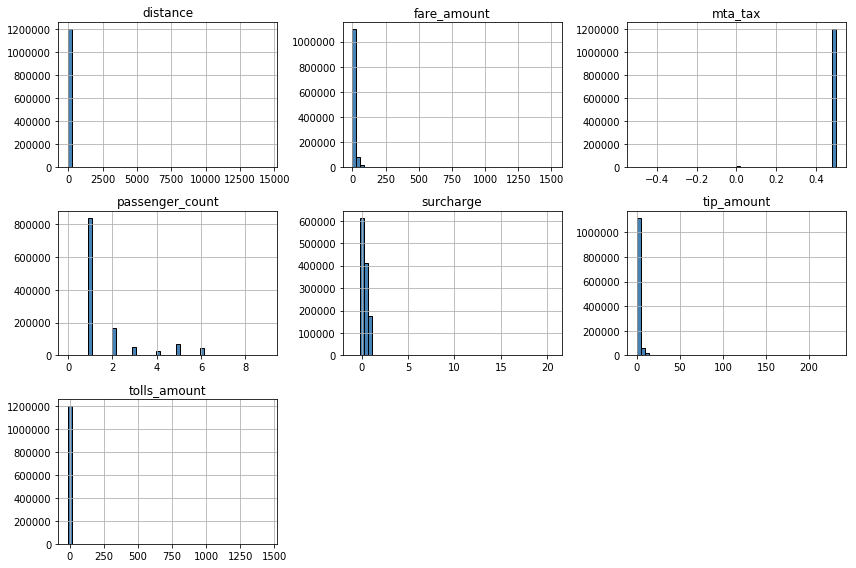

In [ ]:
data.hist(bins=50, color='steelblue', edgecolor='black', linewidth=1.0)    
plt.tight_layout(rect=(0, 0, 2, 2))

###### Bi- variate analysis for intercolumn relation exploration

In [ ]:
sns.pairplot(data,size=4, aspect=1,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


In [ ]:
#convert catagorical to numerical values by getting dummy values
data=pd.get_dummies(data)

In [ ]:
data.head()

In [ ]:
sns.heatmap(round(data.corr(),2),cmap='coolwarm',annot=True)

In [ ]:
#Features and lables
features=data.drop(columns=['fare_amount'])
lable=data['fare_amount']

In [ ]:
#split training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,lable,test_size=0.2,random_state=12)

###### Training and testing:
now we train a randomforestregressor and check the accuracy of the regressor

In [ ]:
rfclf=RandomForestRegressor()

In [ ]:
rfclf.fit(X_train,y_train)

In [ ]:
rfclf.score(X_test,y_test)

##### saving the model to be used later


In [ ]:
with open(r'C:\Users\ALOK DUBEY\Desktop\desktopAppProject\randomForest.pickle','wb') as clf:
    pickle.dump(rfclf,clf)

In [ ]:
features.head()